<a href="https://colab.research.google.com/github/AMEERKOTTA/Deep-Learning-and-Artificial-Intelligence-Tensorflow-2.0/blob/main/Chapter%2002%20%3A%20Machine%20Learning%20and%20Neurons/02_linear_regression_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **REGRESSION IN TENSORFLOW**

+ Here we are trying to Solve the Moore's Law.
+ Here using the `moore.csv` data.

IMPORT THE LIBRARIES

In [1]:
## import the library
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

GET THE DATASET

In [2]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2023-02-14 11:24:14--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2023-02-14 11:24:14 (37.7 MB/s) - ‘moore.csv’ saved [2302/2302]



In [3]:
!ls

moore.csv  sample_data


In [4]:
!head moore.csv

1971,2300
1972,3500
1973,2500
1973,2500
1974,4100
1974,4500
1974,8000
1975,3510
1976,5000
1976,8500


In [10]:
## read the data
data = pd.read_csv("moore.csv", header = None)
data.head()
## convert the dataframe to numpy array
data = data.to_numpy()
# print(data)  ## [       1971        2300] [       1972        3500]
print(data.shape)  ## data is a two dimensional array

(162, 2)


PREPARE THE DATA

In [18]:
## prepare X and Y
X = data[:, 0]
# print(X)  ## [1971 1972 1973 1973 1974 1974 1974 1975 1976 1976 1976 1978 1978 1979] list like this.
## now we need to reshape the X to feed to ML models
X = X.reshape(-1,1)
# print(X)  ## here X will be in reshaped manner.

## prepare the Y
Y = data[:, 1]
# print(Y)  ## [2300        3500        2500        2500        4100        4500]

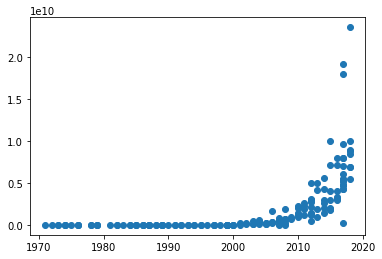

In [21]:
## plot the data
## here we are getting a exponential curve
plt.scatter(X,Y);

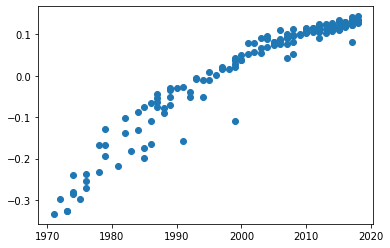

In [25]:
## now taking the log of Y
## this curve will be a linear curve almost
Y = np.log(Y)
plt.scatter(X,Y);

In [33]:
## normalizing X with X (mean)
X = X - X.mean()
# print(X)
# plt.scatter(X,Y)

BUILD THE MODEL

In [35]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape = (1,)),
    tf.keras.layers.Dense(1),
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [37]:
## compile the model
model.compile(
    optimizer = tf.keras.optimizers.SGD(0.001, 0.9),
    loss = "mse"
)


In [40]:
## define a function to schedule the learning rate.
def schedule(epoch, lr):

  if epoch >= 50:
    return 0.0001
  return 0.001

## defining the scheduler
scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)
print(scheduler)

TRAIN THE MODEL

In [41]:
r = model.fit(X, Y, epochs = 200, callbacks = [scheduler])

Epoch 1/200
6/6 [==============================] - 1s 5ms/step - loss: 42.6492 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 4ms/step - loss: 33.0997 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 4ms/step - loss: 19.2313 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 4ms/step - loss: 20.2070 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 4ms/step - loss: 22.2268 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 4ms/step - loss: 17.5337 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 4ms/step - loss: 7.8183 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 4ms/step - loss: 3.5482 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 4ms/step - loss: 3.1109 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 4ms/step - loss: 0.9347 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 5ms/step - loss: 0.5135 - lr

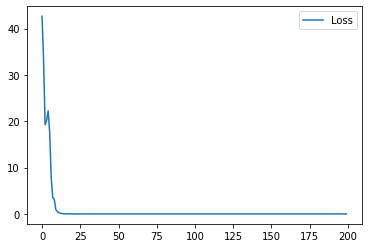

In [43]:
## plot the loss and accuracy
plt.plot(r.history["loss"], label = "Loss")
plt.legend();

In [45]:
model.layers

In [46]:
model.layers[0].get_weights()

[array([[0.00820793]], dtype=float32), array([0.02717653], dtype=float32)]

In [47]:
a = model.layers[0].get_weights()[0][0,0]
print(a)

0.00820793


In [48]:
print("Time to Double :--", np.log(2)/a)

Time to Double :-- 84.44847352287933


***